#  **<span style="color:red">Тема:</span>** Принятие решения в бизнесе на основе данных

#  **<span style="color:red">Целевая установка:</span>**    
**Приоритизировать список гипотез для увеличения выручки:** 
1. Применить фреймворк ICE и RICE для приоритизации гипотез. 
2. Рассмотреть изменения приоритизации гипотез при применении RICE вместо ICE. 

**Проанализировать результаты A/B-тест:**
1. Постройть график, сделайте выводы и предположения:
    - кумулятивной выручки по группам. .
    - кумулятивного среднего чека по группам;
    - относительного изменения кумулятивного среднего чека группы B к группе A;
    - кумулятивной конверсии по группам;
    - относительного изменения кумулятивной конверсии группы B к группе A.
2. Построить точечные графики, сделайте выводы и предположения, определить границу аномальных:
    - количества заказов по пользователям;
    - стоимостей заказов;
3. Посчитать статистическую значимость различий, сделайте выводы и предположения:
    - в конверсии между группами по «сырым» и «очищенным» данным;
    - в среднем чеке заказа между группами по «сырым» и «очищенным» данным.
4. Принять и обосновать решение по результатам теста.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## Приоритизация гипотез

### Загрузка данных и их изучение

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Таблица hypothesis содержит 9 гипотез по увеличению выручки интернет-магазина

Столбцы несут информацию:
- **Hypothesis** - — краткое описание гипотезы;
- **Reach** — скольких пользователей затронет изменение, которое хотим внести (по 10-бальной шкале);
- **Impact** — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта (по 10-бальной шкале); 
- **Confidence** — насколько уверены, что это изменение повлияет на пользоватеальной именно так (по 10-бальной шкале);
- **Effort** — сколько стоит протестировать эту гипотезу (по 10-бальной шкале, чем больше значение, тем дороже) 

**Переведем названия столбцов** в **<span style="color:red">нижний регистр</span>**

In [4]:
hypothesis.columns = hypothesis.columns.str.lower()

### Приоритизация гипотез методом ICE

Проведем **приоритизацию гипотез** методом **<span style="color:blue">ICE</span>**

In [5]:
hypothesis['ice'] = hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
hypothesis[['hypothesis', 'ice']].sort_values(by = 'ice', ascending = False)

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


**<span style="color:red">Вывод</span>**:   

Наиболее **перспективные**  по **<span style="color:blue">ICE</span> гипотезы<span style="color:red"> 8, 0, 7, 6, 2</span>**

### Приоритизация гипотез методом RICE

Проведем **приоритизацию гипотез** методом **<span style="color:blue">RICE</span>**

In [6]:
hypothesis['rice'] = hypothesis['ice']*hypothesis['reach']
hypothesis[['hypothesis', 'rice']].sort_values(by = 'rice', ascending = False)

,hypothesis,rice
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


**<span style="color:red">Вывод</span>**:   

Перечень пяти **перспективных** гипотез по **RICE** совпадает с перечнем пяти **перспективных** гипотез по **ICE**, но по важности (очередности) они изменились - **<span style="color:red">7, 2, 0, 6, 8</span>**   
**Очередность** их изменилась, так как **данные гипотезы** по **охвату пользователей** по убыванию размещены в следуещем порядке **<span style="color:red">7, 2, 0, 6, 8</span>** (7 гипотеза имеет 10 баллов; 2 гипотеза - 8; 0 гипотеза - 3, **но ICE у ней выше** чем у 6 гипотезы; 6 гипотеза - 5, 8 гипотеза - 1) 



### Вывод

Исходя из показателя **RICE**  в первую очередь будем тестировать **<span style="color:red">7, 2, 0, 6, 8</span> гипотезы**

### Загрузка данных и их изучение

In [7]:
orders = pd.read_csv('/datasets/orders.csv')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [9]:
orders.duplicated().sum()

0

Проверим корректность деления пользователей на группы, чтобы исключить попадание пользователя в обе группы, для этого:   
1. сделаем срезы по группам
2. объеденим полученные срезы merge методом inner
3. посчитаем количество уникальных пользователей, входящих в обе группы

In [10]:
user_group_A = orders[orders['group'] == 'A']['visitorId'].reset_index()
user_group_B = orders[orders['group'] == 'B']['visitorId'].reset_index()
users_exclude = user_group_A.merge(user_group_B, on='visitorId', how='inner', suffixes=['_A', '_B'])
len(users_exclude['visitorId'].value_counts())

58

В таблице **"заказы"** столбцы несут информацию:   
**transactionId** — идентификатор заказа, тип данных int64;   
**visitorId** — идентификатор пользователя, совершившего заказ, тип данных int64;   
**date** — дата, когда был совершён заказ, тип данных object (**необходимо перевести в  <span style="color:red">datetime</span>**);   
**revenue** — выручка заказа, тип данных int64;   
**group** — группа A/B-теста, тип данных object

Пропусков и дубликатов - **нет**
Имеются **ошибочные данные** по **<span style="color:red">58 пользователям</span>**, входящим **<span style="color:blue">в обе группы</span>** одновременно

Из результатов изучения **Таблицы 'orders' <span style="color:red">необходимо:</span>**   
- изменить тип данных object на **<span style="color:blue">datetime</span>** в столбце **date**
- названия столбцов **transactionId и visitorId** привести **<span style="color:blue">к нижнему регистру через "_"</span>**
- **<span style="color:blue">удалить</span>** из таблицы данные по пользователям, входящим в обе группы

In [11]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [12]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [13]:
visitors.duplicated().sum()

0

В таблице **"пользователи"** столбцы несут информацию:

**date** — дата, тип данных object (**необходимо перевести в  <span style="color:red">datetime</span>**);   
**group** — группа A/B-теста, тип данных object;   
**visitors** — количество пользователей в указанную дату в указанной группе A/B-теста, тип данных int64;

Пропусков и дубликатов - **нет**

Из результатов изучения **Таблицы 'visitors' <span style="color:red">необходимо:</span>**   
- изменить тип данных object на **<span style="color:blue">datetime</span>** в столбце **date**

**<span style="color:red">Вывод</span>**:   

По результатам изучения **Таблиц 'orders', 'visitors' <span style="color:red">необходимо:</span>**   
- изменить тип данных object на **<span style="color:blue">datetime</span>** в столбцах **date**
- перевести названия столбцов 'transactionId', 'visitorId' в таблице **'orders'** к нижнему регистру через "_"
- **<span style="color:blue">удалить</span>** из таблицы **'orders'** данные по пользователям, входящим в обе группы

**Хотя было бы правильней узнать принадлежность 58 пользователей к той или иной группе и исправить ошибки в столбце group.**

### Подготовка данных к анализу 

In [14]:
orders['date'] = pd.to_datetime(orders['date'])

In [15]:
orders = orders.rename(columns={'transactionId':'transaction_id', 'visitorId':'visitor_id'})

In [16]:
visitors['date'] = pd.to_datetime(visitors['date'])

In [17]:
orders['visitor_id'] = orders[np.logical_not(orders['visitor_id'].isin(users_exclude['visitorId']))]
orders.dropna(subset = ['visitor_id'], inplace = True)    

**<span style="color:red">Вывод</span>**:   
    
По результатам предобработки:   
1. заменены в столбцах **date** таблиц 'orders', 'visitors' тип данных на **<span style="color:blue">datetime</span>**   
2. названия столбцов таблице **'orders'** приведены к нижнему регистру
3. удалены ошибочные данные таблице **'orders'** пользователей, входящих одновременно в группу А и группу В  

Пропусков, дубликатов нет.

**<span style="color:red">Данные готовы к анализу</span>**    


### График кумулятивной выручки по группам

Построим  график **<span style="color:red">кумулятивной выручки</span>** по группам, для чего:
1. **создадим массив <span style="color:blue">уникальных дат, групп</span>**
2. в таблице **cumulative_orders <span style="color:blue">рассчитаем кумулятивные данные</span>**:
    - **<span style="color:red">количество заказов</span> на указанную дату** в указанной группе;
    - **<span style="color:red">количество пользователей, совершивших хотя бы один заказ</span>, на указанную дату** в указанной группе;
    - **<span style="color:red">выручку</span> на указанную дату** в указанной группе;
3.  в таблице cumulative_visitors **рассчитаем кумулятивные данные**:
    - **<span style="color:red">количество посетителей</span>** интернет-магазина **на указанную дату** в определённой группе;
4. методом merge **объеденим** таблицы cumulative_orders и cumulative_visitors по дате, группам
5. **переименуем столбцы** в таблице cumulative_data
    

In [18]:
dates_groups = orders[['date','group']].drop_duplicates()

In [19]:
cumulative_orders = dates_groups.apply(
    lambda x: (
        orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
        .agg({'date' : 'max',
              'group' : 'max',
              'transaction_id' : pd.Series.nunique,
              'visitor_id' : pd.Series.nunique,
              'revenue' : 'sum'}))
        ,axis=1)

In [20]:
cumulative_visitors = dates_groups.apply( 
    lambda x: (
        visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
        .agg({'date' : 'max',
              'group' : 'max',
              'visitors' : 'sum'})),axis=1)

In [21]:
cumulative_data = pd.merge(cumulative_orders, cumulative_visitors, on=['date', 'group'])

cumulative_data = cumulative_data.rename(columns={'transaction_id':'orders', 'visitor_id':'buyers'})

5. **сделаем срез** по группам и **построим  график** кумулятивной выручки

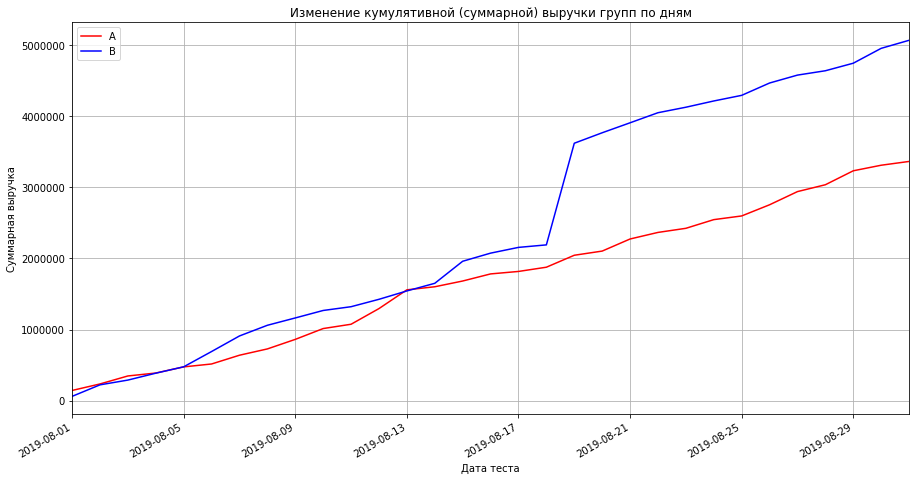

In [22]:
cumulative_revenue_A = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]
cumulative_revenue_B = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]


ax = cumulative_revenue_A.plot(x = 'date', y= 'revenue', label='A',color='r', grid=True, figsize=(15, 8))
cumulative_revenue_B.plot(x = 'date', y= 'revenue', label='B',color='b', grid=True, figsize=(15, 8), ax = ax)
plt.title('Изменение кумулятивной (суммарной) выручки групп по дням')
plt.xlabel('Дата теста')
plt.ylabel('Суммарная выручка')
plt.show() 

**<span style="color:red">Вывод</span>**:   

Выручка почти равномерно **увеличивается** в течение всего теста.  
**<span style="color:red">11-12 августа</span>** график выручки группы "А" и <span style="color:dlue">18 августа</span>** график выручки группы "В" **резко растут**. Это может сигнализировать о **всплесках <span style="color:blue">числа заказов</span>**, или об очень **<span style="color:blue">дорогих заказов</span>** в выборке. 

### График кумулятивного среднего чека по группам

**Построим  график <span style="color:red">кумулятивного среднего чека</span>** по группам, для этого **разделим выручку** на **количество заказов** на указанную дату в указанной группе

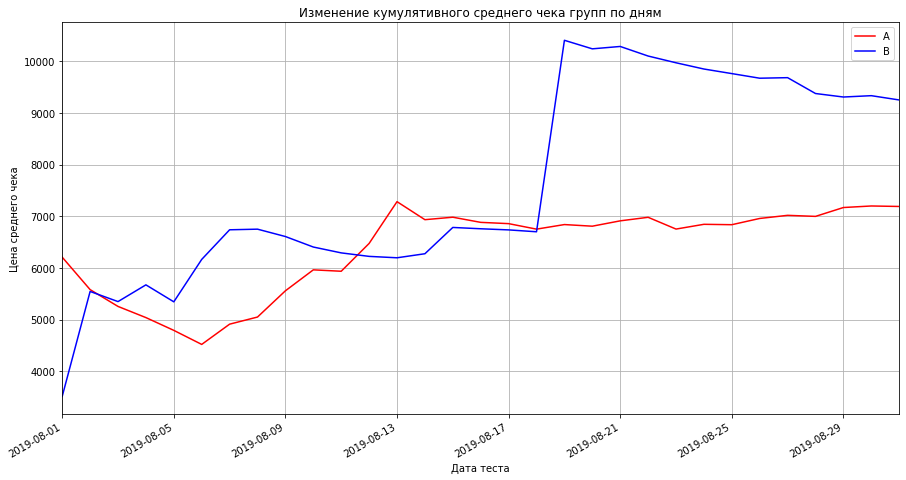

In [23]:
cumulative_revenue_A['average_check'] = cumulative_revenue_A['revenue']/cumulative_revenue_A['orders']
cumulative_revenue_B['average_check'] = cumulative_revenue_B['revenue']/cumulative_revenue_B['orders']


ax = cumulative_revenue_A.plot(x = 'date', y= 'average_check', label='A', color='r', grid=True, figsize=(15, 8))
cumulative_revenue_B.plot(x = 'date', y= 'average_check', label='B', color='b', grid=True, figsize=(15, 8), ax = ax)
plt.title('Изменение кумулятивного среднего чека групп по дням')
plt.xlabel('Дата теста')
plt.ylabel('Цена среднего чека')
plt.show() 

**<span style="color:red">Вывод</span>**:   

**<span style="color:red">Средний чек</span> группы "A"** к концу теста **стабилизируется** (в размере примерно 7300), в **группе "В" <span style="color:blue">продолжает падать</span>**.   

Кроме того, в **группу "B" <span style="color:blue">18 августа</span>**  попали крупные заказы *(резкий всплеск на графике)*, что **существенно сказывается** на значении **<span style="color:red">среднего чека</span>** данной группы. Данные всплески **<span style="color:red">необходимо</span>** при дальнейших расчетах **убирать.**   
Далее средний чек **группу "B" <span style="color:blue">снижается</span>**

### График относительного изменения кумулятивного среднего чека группы B к группе A

Построим  график **<span style="color:red">относительного изменения кумулятивного среднего чека</span> группы "B" к группе "A"**, для этого:
1. **объеденим** таблицы  cumulative_revenue_A и cumulative_revenue_B по столбцу date
2. **разделим** средний чек группы "В" на средний чек группы "А"
3. **построим график** 

In [24]:
cumulative_revenue = cumulative_revenue_A.merge(
    cumulative_revenue_B, 
    left_on='date', 
    right_on='date', 
    how='left', 
    suffixes=['_A', '_B'])

cumulative_revenue['average_check_relative'] = (
    cumulative_revenue['average_check_B']/cumulative_revenue['average_check_A']
)

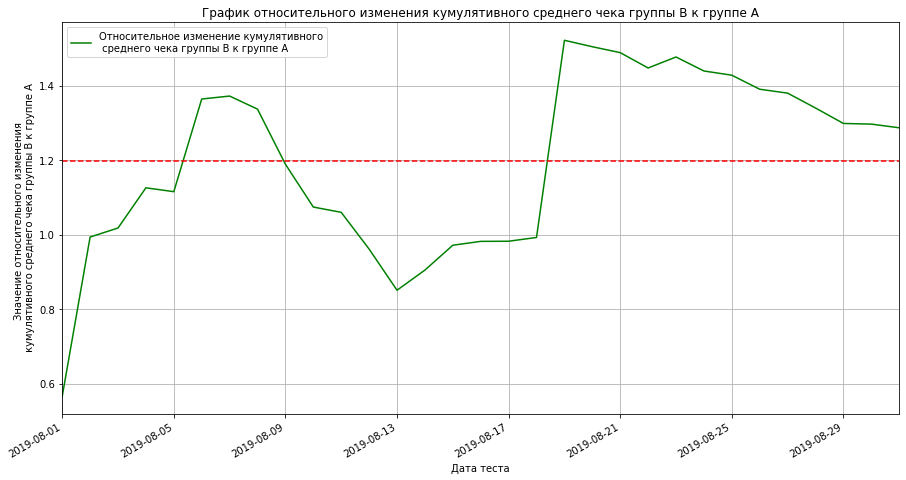

In [25]:
cumulative_revenue.plot(x = 'date', 
                        y= 'average_check_relative', 
                        color='g', 
                        grid=True, 
                        figsize=(15, 8), 
                        label='Относительное изменение кумулятивного\n среднего чека группы B к группе A')

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата теста')
plt.ylabel('Значение относительного изменения \n кумулятивного среднего чека группы B к группе A')
plt.axhline(
    y=cumulative_revenue['average_check_relative'].mean(), 
    color='red', 
    linestyle='--')
plt.show() 

**<span style="color:red">Вывод</span>**:   

**<span style="color:blue">Относительное изменение кумулятивного среднего чека</span> группы "B" к группе "A"** в нескольких точках графика резко «скачет».    
Следовательно, **при проведении теста были <span style="color:red">крупные заказы (выбросы)!</span>**. Как было замечено ранее, данные аномалии **<span style="color:red">необходимо</span>** при дальнейших расчетах **убирать.**

### График кумулятивной конверсии по группам

Построим  график **<span style="color:red">кумулятивной конверсии по группам</span>**, для этого:
1. **сделаем срез** по группам
2. **разделим количество пользователей, совершивших хотя бы один заказ**, на **количество посетителей** интернет-магазина на указанную дату 
3. **построим график** кумулятивной конверсии по группам

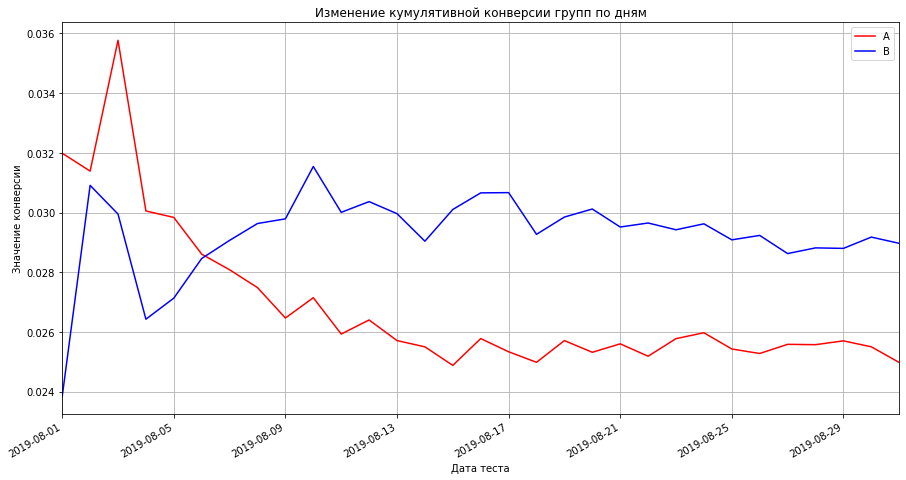

In [26]:
cumulative_conversion_A = cumulative_data[cumulative_data['group']=='A'][['date','buyers', 'visitors']]
cumulative_conversion_B = cumulative_data[cumulative_data['group']=='B'][['date','buyers', 'visitors']]

cumulative_conversion_A['conversion'] = cumulative_conversion_A['buyers']/cumulative_conversion_A['visitors']
cumulative_conversion_B['conversion'] = cumulative_conversion_B['buyers']/cumulative_conversion_B['visitors']

ax = cumulative_conversion_A.plot(x = 'date', y= 'conversion', label='A', color='r', grid=True, figsize=(15, 8))
cumulative_conversion_B.plot(x = 'date', y= 'conversion', label='B', color='b', grid=True, figsize=(15, 8), ax = ax)
plt.title('Изменение кумулятивной конверсии групп по дням')
plt.xlabel('Дата теста')
plt.ylabel('Значение конверсии')
plt.show() 

**<span style="color:red">Вывод</span>**:   

**<span style="color:red">Значение кумулятивной конверсий</span>** группы "А" и "В" к концу теста **<span style="color:blue">стабилизируется</span>** около значения 0.027 и 0.031 соответственно.
По графику видно что **конверсия группы "В" **<span style="color:red">больше</span>, чем группы "А"** - это хороший знак.


### График относительного изменения кумулятивной конверсии группы B к группе A

Построим  график **<span style="color:red">относительного изменения кумулятивной конверсии</span> группы B к группе A**, для этого:
1. **объеденим** таблицы  cumulative_conversion_А и cumulative_conversion_B по столбцу date
2. **разделим** конверсию группы В на конверсию группы А и вычтем единицу
3. **построим график** 

In [27]:
cumulative_conversion = cumulative_conversion_A.merge(
    cumulative_conversion_B, 
    left_on='date', 
    right_on='date', 
    how='left', 
    suffixes=['_A', '_B'])

cumulative_conversion['conversion_relative'] = (
    cumulative_conversion['conversion_B']/cumulative_conversion['conversion_A'] - 1
)


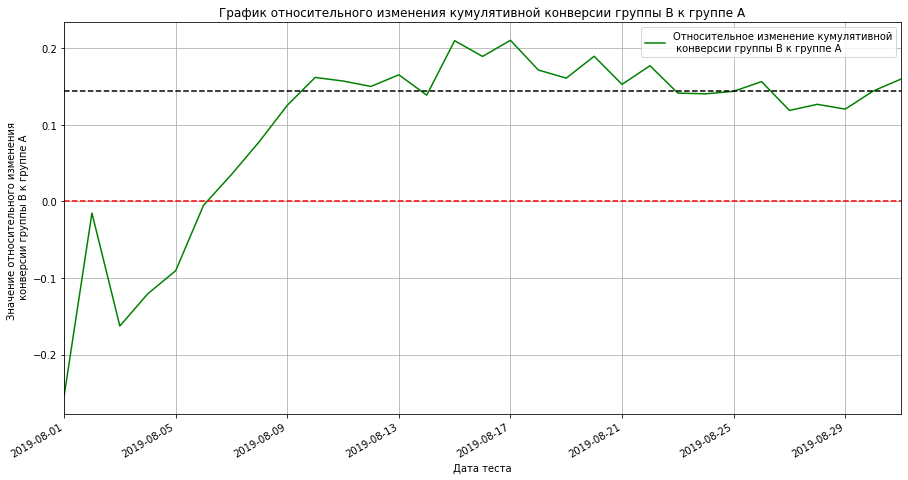

In [28]:
cumulative_conversion.plot(x = 'date', 
                        y= 'conversion_relative', 
                        color='g', 
                        grid=True, 
                        figsize=(15, 8), 
                        label='Относительное изменение кумулятивной\n конверсии группы B к группе A')

plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата теста')
plt.ylabel('Значение относительного изменения \n конверсии группы B к группе A')
plt.axhline(
    y= 0, 
    color='red', 
    linestyle='--')
plt.axhline(
    y= cumulative_conversion['conversion_relative'].median(), 
    color='black', 
    linestyle='--')
plt.show() 

**<span style="color:red">Вывод</span>**:

Значения **относительного изменения кумулятивной конверсии <span style="color:red">стабильно выше 0</span>**, следовательно группа "B" по конверсии **лучше** группы "A".   
Предположительно значения под конец теста стремится к медианному значению, но колебания еще очень большие, следовательно сейчас делать какие-либо выводы нельзя, но возможно исключение аномалий изменят рассматриваемые показатели.   

### Анализ выбросов и всплесков

#### Определение границ аномальных пользователей

Построим  гистограмму и **<span style="color:red">точечный график количества заказов по пользователям</span>**, для этого:
1. для удобства работы **создадим** новый датафрейм **orders_by_users** со **<span style="color:green">столбцами</span> необходимыми** для расчета (**<span style="color:red">transaction_id, visitor_id</span>**);
2. **сгруппируем** по пользователям и посчитаем количество заказов методом nunique;
3. **переименуем столбцы** user_id - пользователи, orders - количество заказов;
4. **построим гистограмму** и **точечный график** количества заказов по пользователям

In [29]:
orders_by_users = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
    .sort_values(by='transaction_id', ascending=False)
)

orders_by_users.columns = ['user_id', 'orders']


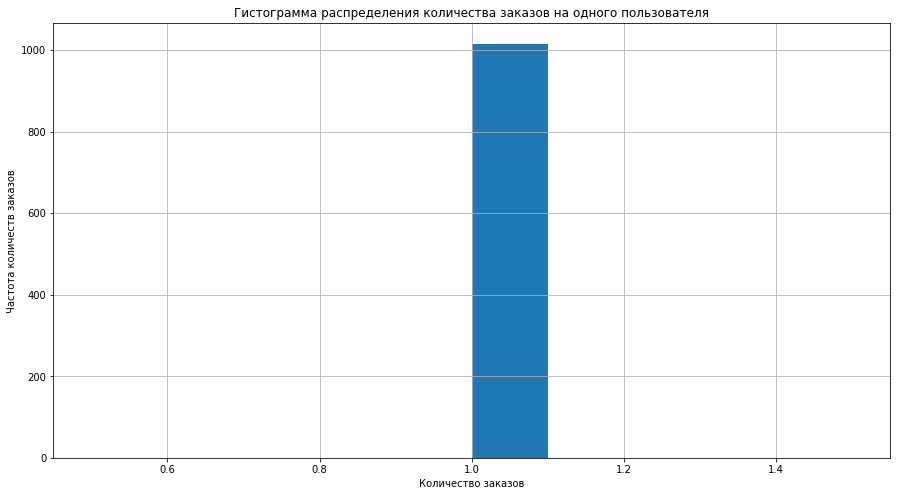

In [30]:
orders_by_users['orders'].hist(bins=10, figsize=(15, 8))
plt.title('Гистограмма распределения количества заказов на одного пользователя')
plt.xlabel('Количество заказов')
plt.ylabel('Частота количеств заказов')
plt.show() 

Как видим из гистограммы, пользователи делали только по **одному** заказу.   
Построим точечный график количества заказов по пользователям, для чего создадим столбец x_values (для оси Х)

In [31]:
x_values = pd.Series(range(0,len(orders_by_users['orders'])))
x_values.name = 'x_values'
orders_by_users = orders_by_users.join(x_values)

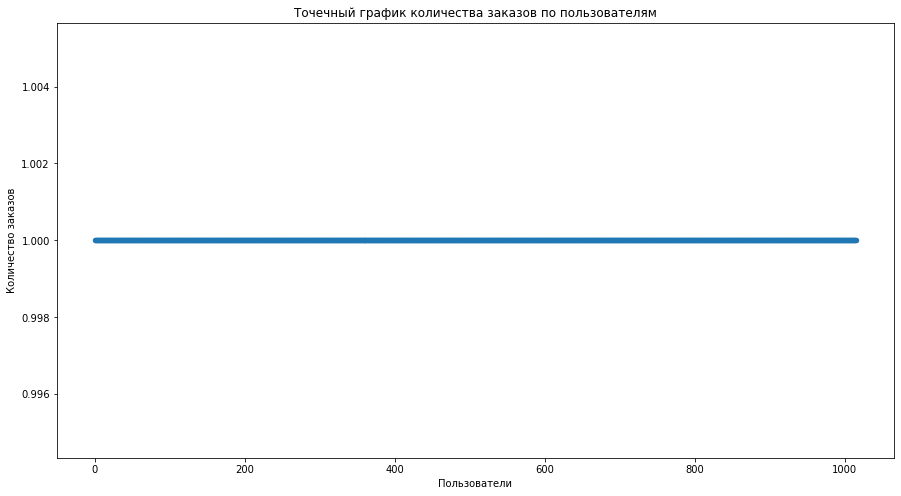

In [32]:
orders_by_users.plot(kind='scatter', x = 'x_values', y = 'orders', figsize=(15, 8))
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.show() 

Вывод сделанный при рассмотрении гистограммы  подтверждаются: пользователи делали только **один заказ** 
То есть по количеству заказов ** аномалий <span style="color:red">нет</span>** - **результат исключения пользователей входящих одновременно в обе группы** 

Расчитаем 95-й и 99-й перцентили количества заказов на пользователя (**Но уже в этом необходимости нет**)

In [33]:
np.percentile(orders_by_users['orders'], [95, 99])

array([1., 1.])

**<span style="color:red">Вывод</span>**:

**<span style="color:blue">Аномальными</span>** пользователей совершивших **<span style="color:blue">большое количество</span>** заказов **<span style="color:red">НЕТ</span>**

#### Определение границ аномальных заказов

Построим  гистограмму и **<span style="color:red">точечный график стоимостей заказов</span>**

In [34]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3.66796e+09,2019-08-15,1650,B
1,2804400009,2.8044e+09,2019-08-15,730,B
3,3797467345,3.79747e+09,2019-08-15,9759,B
4,2282983706,2.28298e+09,2019-08-15,2308,B
5,182168103,1.82168e+08,2019-08-15,2210,B


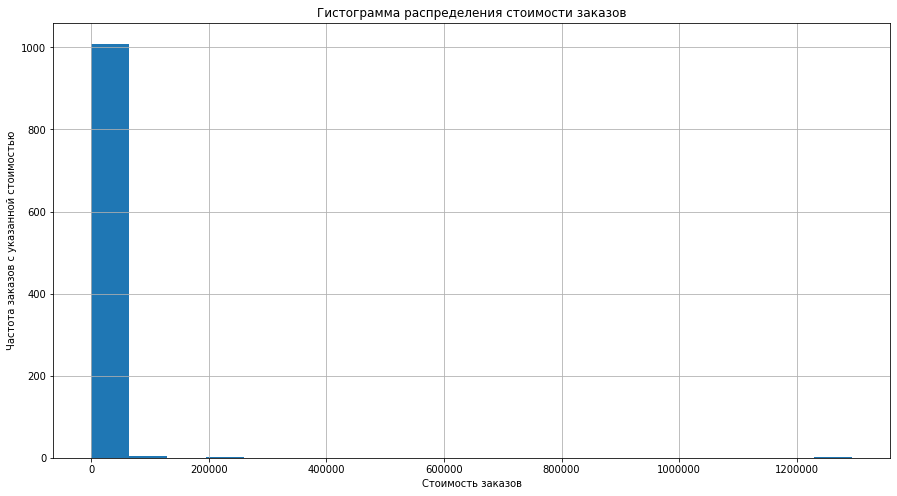

In [35]:
orders['revenue'].hist(bins=20, figsize=(15, 8))
plt.title('Гистограмма распределения стоимости заказов')
plt.xlabel('Стоимость заказов')
plt.ylabel('Частота заказов с указанной стоимостью')
plt.show() 

Из гистограммы видны заказы со **стоимостью более 50000** - это **явно аномальные** заказы. Посмотрим точечный график. 

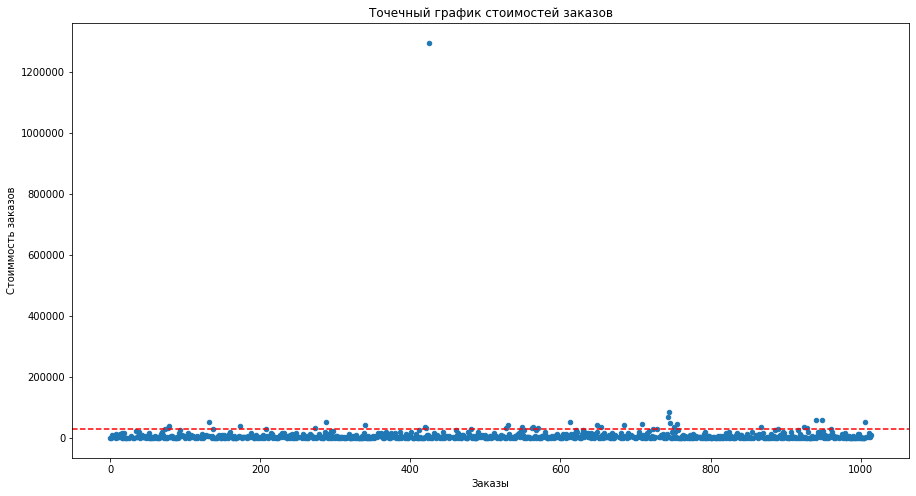

In [36]:
x_values = pd.Series(range(0,len(orders['revenue'])))
x_values.name = 'x_values'
orders_revenue = orders.join(x_values)

orders_revenue.plot(kind='scatter', x = 'x_values', y = 'revenue', figsize=(15, 8))
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Заказы')
plt.ylabel('Стоиммость заказов')
plt.axhline(
    y= 30000, 
    color='red', 
    linestyle='--')
plt.show() 

Большинство заказов лежат в области **ниже 30000**, расчитаем 95-й и 99-й перцентили суммы заказов

In [37]:
np.percentile(orders_revenue['revenue'], [95, 99])

array([26785., 53904.])

Менее 5% совершены заказы на сумму более 26785 и менее 1% - на сумму более 53904 *(значения уменьшились из-за **исключения пользователей, входящих одновременно в обе группы** на этапе предобработке данных)* 

**<span style="color:red">Вывод</span>**:

**<span style="color:blue">Аномальными</span>**  будем считать заказы на сумму **<span style="color:blue">более 26785</span>**

**<span style="color:red">Вывод</span>**: 
По результатам визуального анализа A/B-теста видно, что в данных, есть **выбросы**;

Рассчитав 95-й  перцентиль определили **границу аномалий** - заказы на сумму **<span style="color:blue">более 26785</span>**

### Статистическая значимость различий в конверсии и в среднем чеке заказа  

Для **удобства дальнейшего анализа** создадим таблицу total_data в которой расчитаем для групп:
- количество заказов в выбранную дату; 
- суммарную выручку в выбранную дату;
- количество пользователей в выбранную дату;
- суммарное число заказов до выбранной даты включительно;
- суммарную выручку до выбранной даты включительно;
- количество пользователей до выбранной даты включительно,
для чего:
1. **создадим** таблицу **orders_per_date** (с количеством заказов и суммарной выручкой в выбранную дату), **сделаем срезы по группам;
2. **создадим** таблицу **visitors_per_date** (с количеством пользователей в выбранную дату) и сделаем срез по группам 
3. используя комулятивные данные таблицы cumulative_data **сделаем срез** по группам

In [38]:
orders_per_date = orders.groupby(['date', 'group'], as_index=False
).agg({
    'transaction_id': pd.Series.nunique,
    'visitor_id': pd.Series.nunique,
    'revenue': 'sum'}
).rename(
    columns={'transaction_id':'orders_per_date', 
             'visitor_id':'buyers_per_date', 
             'revenue':'revenue_per_date'})

In [39]:
orders_per_date_A = orders_per_date[orders_per_date['group']=='A'][[
    'date', 
    'orders_per_date',
    'revenue_per_date']]
orders_per_date_B = orders_per_date[orders_per_date['group']=='B'][[
    'date', 
    'orders_per_date', 
    'revenue_per_date']]

In [40]:
visitors_per_date_A = visitors[visitors['group']=='A'][[
    'date', 
    'visitors']
].rename(
    columns={'visitors':'visitors_per_date'})
visitors_per_date_B = visitors[visitors['group']=='B'][[
    'date', 
    'visitors']
].rename(
    columns={'visitors':'visitors_per_date'})

In [41]:
cumulative_data= cumulative_data.rename(
    columns={'orders':'orders_cummulative', 
             'buyers':'buyers_cummulative', 
             'revenue':'revenue_cummulative',
             'visitors': 'visitors_cummulative'})

In [42]:
cumulative_data_A = cumulative_data[cumulative_data['group']=='A'][['date', 
                                                                    'orders_cummulative',
                                                                    'revenue_cummulative',
                                                                    'visitors_cummulative']]
cumulative_data_B = cumulative_data[cumulative_data['group']=='B'][['date', 
                                                                    'orders_cummulative',
                                                                    'revenue_cummulative',
                                                                    'visitors_cummulative']]


4. **объеденим** все данные в общую таблицу

In [43]:
data_A = (orders_per_date_A.merge(visitors_per_date_A, on='date')).merge(cumulative_data_A, on='date') 
data_B = (orders_per_date_B.merge(visitors_per_date_B, on='date')).merge(cumulative_data_B, on='date') 
data_total = data_A.merge(data_B, left_on='date', right_on='date', how='left', suffixes=['_A', '_B'])

In [44]:
data_total.head()

,date,orders_per_date_A,revenue_per_date_A,visitors_per_date_A,orders_cummulative_A,revenue_cummulative_A,visitors_cummulative_A,orders_per_date_B,revenue_per_date_B,visitors_per_date_B,orders_cummulative_B,revenue_cummulative_B,visitors_cummulative_B
0,2019-08-01,23,142779,719,23,142779,719,17,59758,713,17,59758,713
1,2019-08-02,19,91602,619,42,234381,1338,23,162043,581,40,221801,1294
2,2019-08-03,24,112473,507,66,346854,1845,14,67049,509,54,288850,1803
3,2019-08-04,11,41176,717,77,388030,2562,14,96890,770,68,385740,2573
4,2019-08-05,22,86383,756,99,474413,3318,21,89908,707,89,475648,3280


#### Статистическая значимость различия в конверсии между группами по "сырым" данным

Перед расчетом статистической значимости различия в конверсии между группами сформулируем нулевую гипотезу:   
H₀ - статистических различий в конверсиях групп А и В нет. Конверсии ровны.   
Альтернативная гипотеза:   
H₁ - статистические различия в конверсиях групп А и В есть. Конверсии отличаются. 

Рассчитаем **<span style="color:blue">статистическую значимость различия в конверсии</span>** между группами.
**Создадим переменные orders_by_users_A и orders_by_users_B** со столбцами 'user_id', 'orders'. В них для пользователей, которые совершали заказ, укажем число совершённых заказов.

In [45]:
orders_by_users_A = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_A.columns = ['user_id', 'orders']
orders_by_users_B = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_B.columns = ['user_id', 'orders']

**Объявим переменные sampleA и sampleB**, в которых пользователям из разных групп будет соответствовать количество заказов. *Тем, кто ничего не заказал, будут соответствовать нули*

In [46]:
sampleA = pd.concat(
[
    orders_by_users_A['orders'],
    pd.Series(
        0, 
        index=np.arange(data_total['visitors_per_date_A'].sum() - len(orders_by_users_A['orders'])),
        name='orders')
],
    axis=0)

sampleB = pd.concat(
[
    orders_by_users_B['orders'],
    pd.Series(
        0, 
        index=np.arange(data_total['visitors_per_date_B'].sum() - len(orders_by_users_B['orders'])),
        name='orders')
],
    axis=0)

Применяя тест Манна-Уитни, **определим <span style="color:red">статистическую значимость различия конверсии</span>** и **рассчитаем <span style="color:blue">относительное различие в конверсии</span>** между группами

In [47]:
alpha = 0.05
results = stats.mannwhitneyu(sampleA, sampleB, alternative="two-sided")[1]
print('P-value: {:.5f}'.format(results))
if results < alpha:
    print('По сырым данным статистически значимые различия в конверсии между группами есть')
else:    
    print('По сырым данным статистически значимых различий в конверсии между группами нет')


if (sampleB.mean() / sampleA.mean() - 1) >= 0:
    print('\nПрирост конверсии группы B относительно конверсии группы А равен {:.1%}'
          .format((sampleB.mean() / sampleA.mean() - 1)))
else:
    print('\nСнижение конверсии группы B относительно конверсии группы А составляет {:.1%}'
          .format(abs(sampleB.mean() / sampleA.mean() - 1)))

    


P-value: 0.01685
По сырым данным статистически значимые различия в конверсии между группами есть

Прирост конверсии группы B относительно конверсии группы А равен 16.0%


 **<span style="color:red">Вывод</span>:**   

p-value = 0.01685 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. **<span style="color:red">Различия между конверсиями групп В и А существуют</span>**   
**Относительный прирост** конверсии группы B к конверсии группы А равен 16.0%.

#### Статистическая значимость различия в среднем чеке заказа между группами по "сырым" данным

Сформулируем нулевую гипотезу:   
H₀ - статистических различий в значениях средних чеков групп А и В нет. Средние чеки ровны.   
Альтернативная гипотеза:   
H₁ - статистические различия в значениях средних чеков групп А и В есть. Средние чеки отличаются. 

Применяя тест Манна-Уитни, **определим <span style="color:red">статистическую значимость различия значений среднего чека</span>** и **рассчитаем <span style="color:blue">относительное различие значений среднего чека</span>** между группами по "сырым" данным

In [48]:
results = stats.mannwhitneyu(
    orders[orders['group']=='A']['revenue'], 
    orders[orders['group']=='B']['revenue'],
    alternative="two-sided"
)[1]
print('P-value: {:.5f}'.format(results))
if results < alpha:
    print('По сырым данным существуют статистически значимые различия значения среднего чека между группами')
else:    
    print('По сырым данным статистически значимых различий значений среднего чека между группами нет')

    
if (orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1) >= 0:
    print('\nПрирост значения среднего чека группы B относительно среднего чека группы А равен {:.1%}'
          .format(
              orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1
          )
         )
else:
    print('\nСнижение значения среднего чека группы B относительно среднего чека группы А составляет {:.1%}'
          .format(
              abs(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)
          )
         )
    

P-value: 0.82949
По сырым данным статистически значимых различий значений среднего чека между группами нет

Прирост значения среднего чека группы B относительно среднего чека группы А равен 28.7%


**<span style="color:red">Вывод</span>:**   

p-value = 0.82949 больше 0.05. Значит, **нулевую гипотезу** о том, что статистически значимых различий в значениях среднего чека между группами нет, **не отвергаем**. **<span style="color:red">Различий между значениями среднего чека групп В и А нет</span>**   
Вместе с тем виден **значительное превышение** среднего чека группы B над средним чеком группы А равен (28.7%). Вероятней всего на эти данные влияют анномальные суммы заказов.

#### Статистическая значимость различия в конверсии между группами по "очищенным" данным

**Рассчитаем <span style="color:red">статистическую значимость различия конверсии</span>** между группами **по «очищенным» данным**, для чего:
1. **сделаем срезы пользователей**, совершивших **заказы дороже более 26785** — users_with_expensive_orders

In [49]:
users_with_expensive_orders = orders[orders['revenue'] > 26785]['visitor_id']
print('Всего {} аномальных пользователей'.format(len(users_with_expensive_orders)))

Всего 51 аномальных пользователей


2. **подготовим выборки количества заказов** по пользователям по группам теста
4. применяя тест Манна-Уитни, **определим <span style="color:red">статистическую значимость различия конверсии</span>** и **рассчитаем <span style="color:blue">относительное различие в конверсии</span>** между группами

In [50]:
sampleA_filtered = pd.concat(
[
    orders_by_users_A[np.logical_not(orders_by_users_A['user_id'].isin(users_with_expensive_orders))]['orders'],
    pd.Series(
        0, 
        index=np.arange(data_total['visitors_per_date_A'].sum() - len(orders_by_users_A['orders'])),
        name='orders')
],
    axis=0)

sampleB_filtered = pd.concat(
[
    orders_by_users_B[np.logical_not(orders_by_users_B['user_id'].isin(users_with_expensive_orders))]['orders'],
    pd.Series(
        0, 
        index=np.arange(data_total['visitors_per_date_B'].sum() - len(orders_by_users_B['orders'])),
        name='orders')
],
    axis=0)

In [52]:
results = stats.mannwhitneyu(sampleA_filtered, sampleB_filtered, alternative="two-sided")[1]
print('P-value: {:.5f}'.format(results))
if results < alpha:
    print('По очищенным данным статистически значимые различия в конверсии между группами есть')
else:    
    print('По очищенным данным статистически значимых различий в конверсии между группами нет')


if (sampleB_filtered.mean() / sampleA_filtered.mean() - 1) >= 0:
    print('\nПрирост конверсии группы B относительно конверсии группы А равен {:.1%}'
          .format((sampleB_filtered.mean() / sampleA_filtered.mean() - 1)))
else:
    print('\nСнижение конверсии группы B относительно конверсии группы А составляет {:.1%}'
          .format(abs(sampleB_filtered.mean() / sampleA_filtered.mean() - 1)))

P-value: 0.02536
По очищенным данным статистически значимые различия в конверсии между группами есть

Прирост конверсии группы B относительно конверсии группы А равен 15.3%


**<span style="color:red">Вывод</span>:**   
По "очищенным" данным P-value тоже меньше 0.05, что подтверждает **<span style="color:red">различия между конверсиями групп "В" и "А" существуют</span>**   
**относительный <span style="color:red">прирост</span> конверсии** группы "B" к конверсии группы "А" **составляет до 15.3%** 

#### Статистическая значимость различия в среднем чеке заказа между группами по "сырым" данным

Посмотрим,как **исключение аномалий повлияло** на **<span style="color:red">статистическую значимость различия значений среднего чека</span>** и  **<span style="color:blue">относительное различие значений среднего чека</span>** между группами 

In [53]:
results = stats.mannwhitneyu(
    orders[
        np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(users_with_expensive_orders))
                )
    ]['revenue'], 
    orders[
        np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(users_with_expensive_orders))
                )
    ]['revenue'],
    alternative="two-sided"
)[1]
print('P-value: {:.5f}'.format(results))
if results < alpha:
    print('По очищенным данным существуют статистически значимые различия значения среднего чека между группами')
else:    
    print('По очищенным данным статистически значимых различий значений среднего чека между группами нет')

    
if (orders[
    np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(users_with_expensive_orders))
                )
]['revenue'].mean()/orders[
    np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(users_with_expensive_orders))
                )
]['revenue'].mean()-1) >= 0:
    print('\nПрирост значения среднего чека группы B относительно среднего чека группы А равен {:.1%}'
          .format(
              orders[
    np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(users_with_expensive_orders))
                )
]['revenue'].mean()/orders[
    np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(users_with_expensive_orders))
                )
]['revenue'].mean()-1)
         )
else:
    print('\nСнижение значения среднего чека группы B относительно среднего чека группы А составляет {:.1%}'
          .format(
              abs(orders[
    np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(users_with_expensive_orders))
                )
]['revenue'].mean()/orders[
    np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(users_with_expensive_orders))
                )
]['revenue'].mean()-1)
          )
         )

P-value: 0.69868
По очищенным данным статистически значимых различий значений среднего чека между группами нет

Снижение значения среднего чека группы B относительно среднего чека группы А составляет 5.9%


### **<span style="color:red">Вывод</span>:**   

**Исключение анномальных заказов** почти не повлияло на p-value (p-value все равно больше 0.05) **Нулевую гипотезу** о том, что статистически значимых различий в значениях среднего чека между группами нет, **не отвергаем**. 
**<span style="color:red">Различий между значениями среднего чека групп В и А нет</span>**   
Кроме того, **средний чек по "очищенным" данным группы B** стал **<span style="color:red">немного меньше</span> среднего чека группы А** (-5.9%). Следовательно, **достоверно можно предположить**, что **<span style="color:red">относительное различие значений среднего чека</span>** между группами **стремится к нулевому значению**.

### Общий вывод анализа А/В - теста

По результатам анализа А/В - теста можно сделать выводы:
1. **Статистически значимое различие по конверсии** между группами как по сырым данным, так и после фильтрации аномалий **<span style="color:red">есть</span>**.
2. **График различия конверсии** между группами показал, что **результаты группы "B" <span style="color:red">лучше</span> группы "A"**, при этом расчеты по данным  без учета аномалий показывают прирост конверсии группы B относительно конверсии группы А равный 17.3%.
3. По сырым данным **<span style="color:red">нет</span>** статистически значимого различия **по среднему чеку** между группами. Кроме того, после удаления аномалий отностельное различие значений среднего чека групп блиско к нулевому значению (-2%).
4. **График различия среднего чека колеблется. **Сделать из этого графика определённые выводы <span style="color:blue">нельзя</span>**. Однако **позволяет определить наличие аномалий**.

Исходя из этого, **предлагается тест <span style="color:red">остановить</span>**, **<span style="color:blue">афиксировать победу группы В</span> по конверсии** 